In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv('AmesHousing.csv')
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [11]:
print("Column Names:", df.columns.tolist())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])

# Check data types
print(df.dtypes)

Column Names: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive

In [87]:
df['Neighborhood']
print(df["Year Remod/Add"].value_counts())


Year Remod/Add
1950    358
2006    201
2007    163
2005    139
2004    111
       ... 
1986     13
1981     13
2010     13
1983     11
1982      9
Name: count, Length: 61, dtype: int64


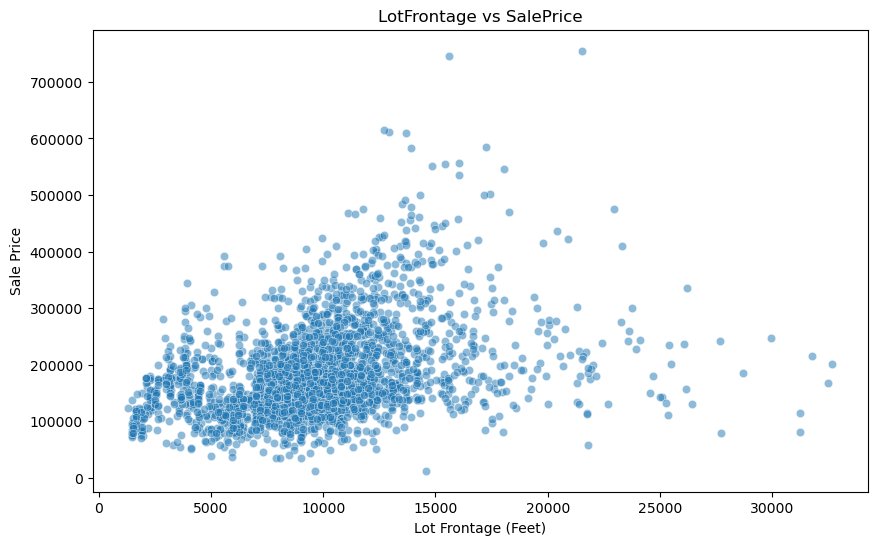

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["Lot Area"] < df["Lot Area"].quantile(0.99)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Lot Area", y="SalePrice", alpha=0.5)
plt.title("LotFrontage vs SalePrice")
plt.xlabel("Lot Frontage (Feet)")
plt.ylabel("Sale Price")
plt.show()


/var/folders/1m/1xttz4dj6yn7nywb9_fhdbs40000gn/T/ipykernel_39549/1501457560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Alley"] = df["Alley"].fillna("None")


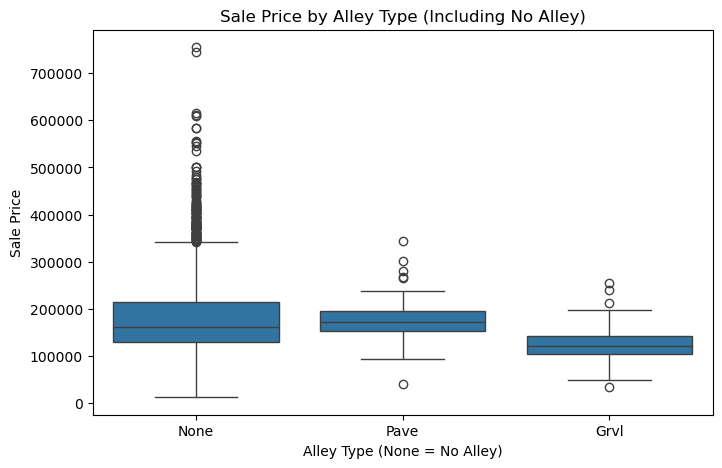

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace NaN values with "None" to indicate houses without alleys
df["Alley"] = df["Alley"].fillna("None")

# Plot boxplot to compare sale prices of houses with and without alleys
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Alley", y="SalePrice")
plt.title("Sale Price by Alley Type (Including No Alley)")
plt.xlabel("Alley Type (None = No Alley)")
plt.ylabel("Sale Price")
plt.show()


In [36]:
import scipy.stats as stats

# Create subsets for each Alley type
group_none = df[df["Alley"] == "None"]["SalePrice"]
group_pave = df[df["Alley"] == "Pave"]["SalePrice"]
group_grvl = df[df["Alley"] == "Grvl"]["SalePrice"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(group_none, group_pave, group_grvl)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.6f}")


ANOVA F-statistic: 32.981, p-value: 0.000000


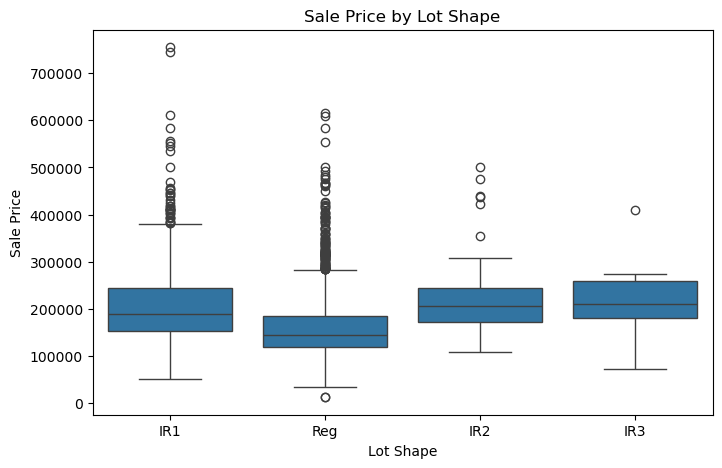

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Lot Shape", y="SalePrice")
plt.title("Sale Price by Lot Shape")
plt.xlabel("Lot Shape")
plt.ylabel("Sale Price")
plt.show()


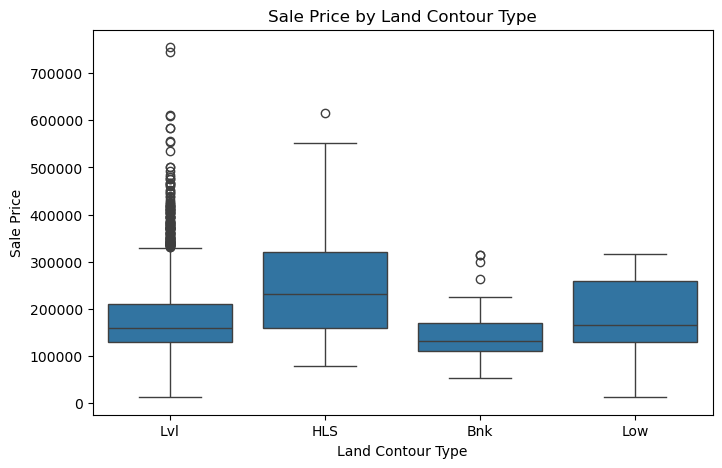

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Land Contour", y="SalePrice")
plt.title("Sale Price by Land Contour Type")
plt.xlabel("Land Contour Type")
plt.ylabel("Sale Price")
plt.show()


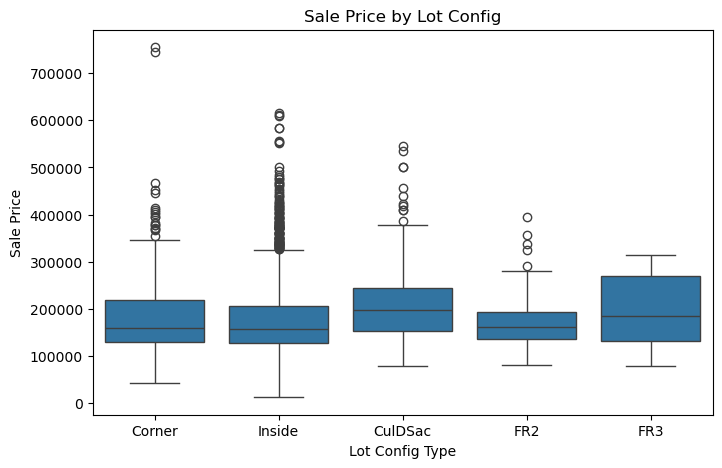

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Lot Config", y="SalePrice")
plt.title("Sale Price by Lot Config")
plt.xlabel("Lot Config Type")
plt.ylabel("Sale Price")
plt.show()


In [60]:
correlation = df["Overall Qual"].corr(df["SalePrice"])
print(f"Correlation between OverallQual and SalePrice: {correlation:.3f}")


Correlation between OverallQual and SalePrice: 0.808


In [62]:
correlation = df["Overall Cond"].corr(df["SalePrice"])
print(f"Correlation between OverallCond and SalePrice: {correlation:.3f}")


Correlation between OverallCond and SalePrice: -0.105


In [63]:
df["Cond_Qual_Interaction"] = df["Overall Cond"] * df["Overall Qual"]
interaction_corr = df["Cond_Qual_Interaction"].corr(df["SalePrice"])
print(f"Correlation between (OverallCond * OverallQual) and SalePrice: {interaction_corr:.3f}")


Correlation between (OverallCond * OverallQual) and SalePrice: 0.564


In [65]:
import statsmodels.api as sm

X = df[["Overall Qual"]]  # Only using OverallQual
X = sm.add_constant(X)  # Add intercept
y = df["SalePrice"]

model_qual = sm.OLS(y, X).fit()
print(model_qual.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     5433.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:09:39   Log-Likelihood:                -35278.
No. Observations:                2900   AIC:                         7.056e+04
Df Residuals:                    2898   BIC:                         7.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.584e+04   3839.790    -24.960   

In [67]:
X = df[["Overall Qual", "Cond_Qual_Interaction"]]
X = sm.add_constant(X)  # Add intercept

model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2728.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:09:54   Log-Likelihood:                -35274.
No. Observations:                2900   AIC:                         7.055e+04
Df Residuals:                    2897   BIC:                         7.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.383e+

In [77]:
df["OverallQual_Squared"] = df["Overall Qual"] ** 4
qual_squared_corr = df["OverallQual_Squared"].corr(df["SalePrice"])
print(f"Correlation between OverallQual² and SalePrice: {qual_squared_corr:.3f}")



Correlation between OverallQual² and SalePrice: 0.845


In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Define features for VIF test
X = df[["Overall Qual", "OverallQual_Squared"]]
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


               Feature        VIF
0                const  73.881381
1         Overall Qual   6.442188
2  OverallQual_Squared   6.442188


In [80]:
X = df[["OverallQual_Squared", "Overall Qual"]]
X = sm.add_constant(X)  # Add intercept
y = df["SalePrice"]

model_qual = sm.OLS(y, X).fit()
print(model_qual.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     3724.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:13:58   Log-Likelihood:                -34963.
No. Observations:                2900   AIC:                         6.993e+04
Df Residuals:                    2897   BIC:                         6.995e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.499e+04   6

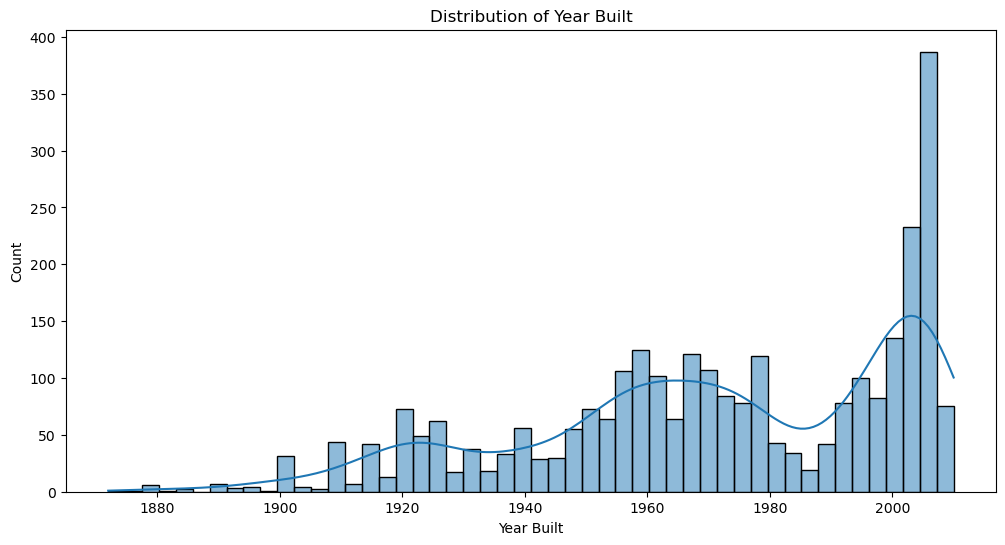

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df["Year Built"], bins=50, kde=True)
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.show()


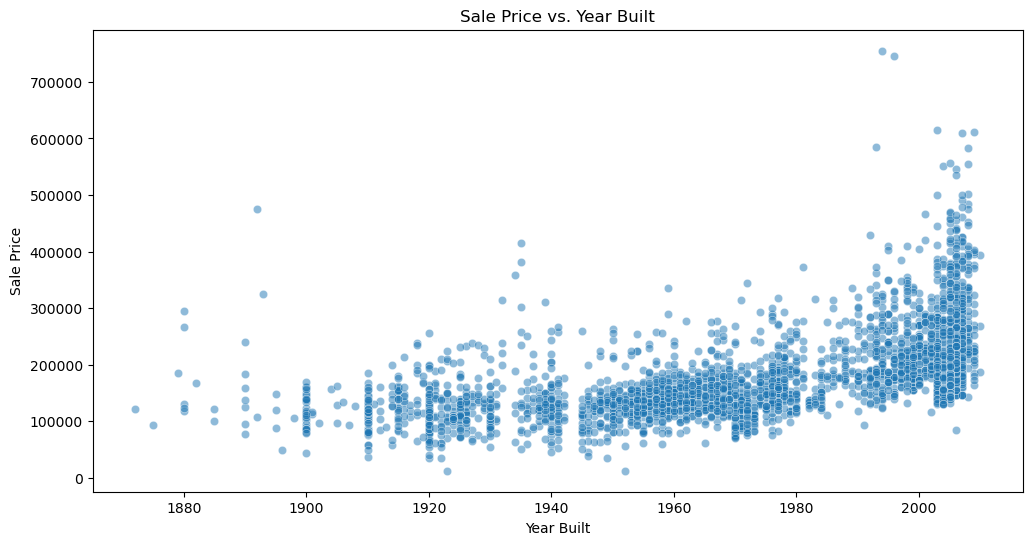

In [84]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Year Built", y="SalePrice", alpha=0.5)
plt.title("Sale Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


In [86]:
yearbuilt_corr = df["Year Built"].corr(df["SalePrice"])
print(f"Correlation between YearBuilt and SalePrice: {yearbuilt_corr:.3f}")


Correlation between YearBuilt and SalePrice: 0.566


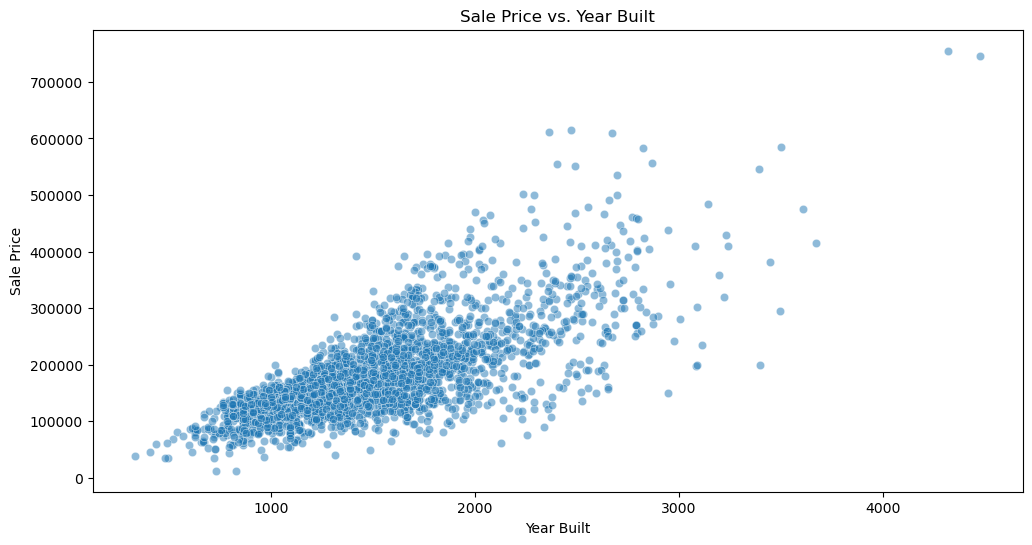

In [90]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice", alpha=0.5)
plt.title("Sale Price vs. Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()


In [116]:
yearbuilt_corr = df["Gr Liv Area"].corr(df["SalePrice"])
print(f"Correlation between YearBuilt and SalePrice: {yearbuilt_corr:.3f}")


Correlation between YearBuilt and SalePrice: 0.726


In [117]:
df["Condition 2"]

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
2925    Norm
2926    Norm
2927    Norm
2928    Norm
2929    Norm
Name: Condition 2, Length: 2900, dtype: object

In [158]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

df["HouseAge"] = 2024 - df["Year Built"]  # Replace 2024 with the dataset's last sale year

scaler = StandardScaler()
features_to_scale = ["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Cond_Qual_Interaction"]

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

X = df[["Lot Area", "Gr Liv Area", "Year Remod/Add", 
        "OverallQual_Squared", "HouseAge", "Condition 1", "Condition 2", "Cond_Qual_Interaction"]]

# One-hot encode 'Condition1' and 'Condition2' columns
X = pd.get_dummies(X, columns=["Condition 1", "Condition 2"], drop_first=True)

# Ensure all data is numeric by converting to float
X = X.astype(float)
y = y.astype(float)

print(X.head())
y = df["SalePrice"]


   Lot Area  Gr Liv Area  Year Remod/Add  OverallQual_Squared  HouseAge  \
0  5.567726     0.337705       -1.164933            -0.321277  0.375951   
1  0.504640    -1.220666       -1.116969            -0.718899  0.342928   
2  1.169315    -0.332805       -1.260859            -0.321277  0.441997   
3  0.388542     1.268627       -0.781225             0.333525  0.111766   
4  1.059499     0.282342        0.657678            -0.718899 -0.845903   

   Cond_Qual_Interaction  Condition 1_Feedr  Condition 1_Norm  \
0              -0.409589                0.0               1.0   
1              -0.409589                1.0               0.0   
2               0.246296                0.0               1.0   
3               0.136982                0.0               1.0   
4              -0.956160                0.0               1.0   

   Condition 1_PosA  Condition 1_PosN  ...  Condition 1_RRAn  \
0               0.0               0.0  ...               0.0   
1               0.0           

In [159]:
# Reset the index of X and y to ensure they are aligned
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Fit the reduced model (just the intercept)
X_reduced = sm.add_constant(pd.DataFrame({'constant': [1]*len(y)}))  # Only intercept
reduced_model = sm.OLS(y, X_reduced).fit()

# Fit the full model (with the selected features)
full_model = sm.OLS(y, X).fit()

# Output results
print(full_model.summary())
print(reduced_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     833.1
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:54:46   Log-Likelihood:                -33971.
No. Observations:                2900   AIC:                         6.799e+04
Df Residuals:                    2878   BIC:                         6.812e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.622e+

In [161]:
# Get the RSS for the full model and reduced model
RSS_full = sum((full_model.resid) ** 2)  # Residual sum of squares for the full model
RSS_reduced = sum((reduced_model.resid) ** 2)  # Residual sum of squares for the reduced model

# Number of observations and number of features (excluding intercept)
n = len(y)  # Number of observations
p_full = full_model.df_model  # Number of features in the full model
p_reduced = reduced_model.df_model  # Number of features in the reduced model

# Calculate the F-statistic
F_statistic = ((RSS_reduced - RSS_full) / (p_full - p_reduced)) / (RSS_full / (n - p_full - 1))

# Calculate the p-value for the F-statistic
from scipy.stats import f
p_value = 1 - f.cdf(F_statistic, p_full - p_reduced, n - p_full - 1)

# Output the F-statistic and p-value
print(f"F-statistic: {F_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


F-statistic: 833.055
P-value: 0.000


In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF calculation
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                  Feature         VIF
0                   const  611.690316
1                Lot Area    1.204904
2             Gr Liv Area    1.709661
3          Year Remod/Add    2.023409
4     OverallQual_Squared    2.920130
5                HouseAge    2.194631
6   Cond_Qual_Interaction    1.990368
7       Condition 1_Feedr    2.710086
8        Condition 1_Norm    4.217917
9        Condition 1_PosA    1.345340
10       Condition 1_PosN    1.511008
11       Condition 1_RRAe    1.343645
12       Condition 1_RRAn    1.662807
13       Condition 1_RRNe    1.068572
14       Condition 1_RRNn    1.131719
15      Condition 2_Feedr    3.477499
16       Condition 2_Norm    5.769470
17       Condition 2_PosA    2.009012
18       Condition 2_PosN    1.728165
19       Condition 2_RRAe    1.216283
20       Condition 2_RRAn    1.211974
21       Condition 2_RRNn    1.424057


In [163]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2030
Test set size: 870


In [164]:
# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the model summary for training data
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     640.9
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:58:31   Log-Likelihood:                -23709.
No. Observations:                2030   AIC:                         4.746e+04
Df Residuals:                    2009   BIC:                         4.758e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.664e+

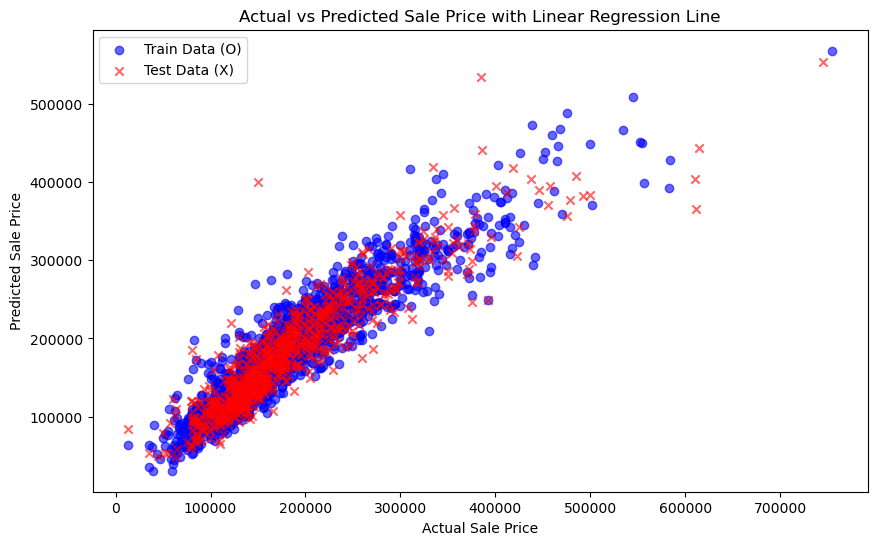

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plotting the training data predictions (blue 'O' markers)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plotting the test data predictions (red 'X' markers)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()


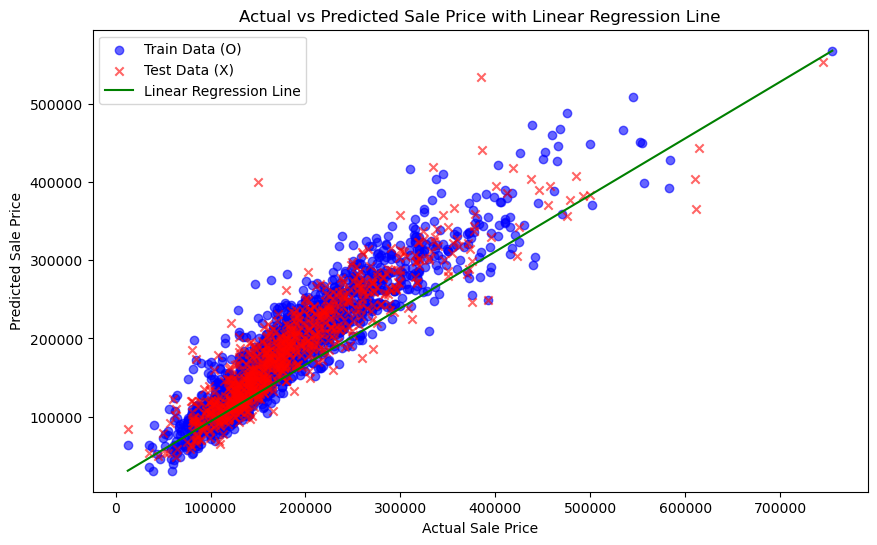

R² on Test Data: 0.838
RMSE on Test Data: 32696.103


In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that the 'HouseAge' column is created
df["HouseAge"] = 2024 - df["Year Built"]

# Features to scale
features_to_scale = ["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Cond_Qual_Interaction"]

# Scale the selected features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Prepare the feature matrix X and target vector y
X = df[["Lot Area", "Gr Liv Area", "Year Remod/Add", "OverallQual_Squared", "HouseAge", "Condition 1", "Condition 2", "Cond_Qual_Interaction"]]

# One-hot encode 'Condition1' and 'Condition2' columns
X = pd.get_dummies(X, columns=["Condition 1", "Condition 2"], drop_first=True)

# Ensure the target variable y is numeric
y = df["SalePrice"]

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Plot the training data predictions (blue 'O' markers)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data (O)', alpha=0.6, marker='o')

# Plot the test data predictions (red 'X' markers)
plt.scatter(y_test, y_test_pred, color='red', label='Test Data (X)', alpha=0.6, marker='x')

# Plot the linear regression line (fit a line for the plot)
plt.plot([min(y), max(y)], [min(y_train_pred), max(y_train_pred)], color='green', label='Linear Regression Line')

# Labels and Title
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price with Linear Regression Line")

# Add a legend to distinguish between train, test, and the regression line
plt.legend()

# Show plot
plt.show()

# Evaluate model performance using R² and RMSE
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_test_pred)

print(f"R² on Test Data: {r2:.3f}")
print(f"RMSE on Test Data: {rmse:.3f}")
